<a href="https://colab.research.google.com/github/rahayunr16/Submission-Belajar-Pengembangan-Machine-Learning-1/blob/main/Proyek_Analisis_Sentimen_Rahayu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyek Analisis Sentimen Tokopedia Apps dari Playstore**

------

**Sumber Dataset**:  
   Dataset diperoleh dari data hasil scrapping dan merupakan review dari penggunaan Tokopedia.

**Total Rows:** 15.000

**Total Columns:** 5

**Column Names:**
```
    Review ID  : id
    Username   : Pengguna yang komentarin
    Review     : Komentar dari pengguna
    Rating     : Penilaian dari pengguna dari skala 1-5
    Date       : Date ketika pengguna mengunggah review
```


      

##**1. Import Library**


---



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import string
import nltk

!pip install Sastrawi

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from scipy.stats import chi2_contingency
from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm.notebook import tqdm

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True



---



##**2. Memuat Dataset**


---



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df ='/content/drive/MyDrive/LASKAR AI/SUBMISSION/Tokopedia_Reviews.csv'
df = pd.read_csv(df)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,3.306.0,2025-05-04 02:58:19,NaN,NaN,3.306.0
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,0,NaN,2025-05-04 02:36:44,NaN,NaN,NaN
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jelek banget,4,0,NaN,2025-05-04 02:35:48,NaN,NaN,NaN
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terbaik,5,0,3.309.0,2025-05-04 02:20:26,NaN,NaN,3.309.0
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,KEMANA FITUR TUKAR TAMBAH!!!!,2,0,3.309.0,2025-05-04 01:43:05,"Hi Toppers, terima kasih untuk rating dan ulas...",2025-03-05 00:27:06,3.309.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,a6921862-8688-48e2-8302-e04a2057e3d4,Mamah Fajar,https://play-lh.googleusercontent.com/a/ACg8oc...,Najis banget nih aplikasi,1,0,NaN,2025-01-03 07:04:56,"Halo Toppers, terima kasih atas rating yang ka...",2025-01-03 07:08:01,NaN
14996,ad4ec101-b784-48a3-a17e-3ee9459e759e,Anjing Anjing,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus,5,0,3.294.1,2025-01-03 06:56:03,"Toppers, terima kasih atas rating yang kamu be...",2025-01-03 07:08:03,3.294.1
14997,5609d48d-e844-4c1a-acde-b76b8e1726ac,Keiko Iko,https://play-lh.googleusercontent.com/a/ACg8oc...,penanganan masalah keluhan konsumen berhari2 ....,1,0,3.294.1,2025-01-03 06:51:10,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-01-03 07:08:04,3.294.1
14998,2747296a-02c2-4550-8084-05fdda45ba54,Mindo Fals,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus sekali,5,0,NaN,2025-01-03 06:46:28,"Toppers, terima kasih atas rating yang kamu be...",2025-01-03 06:48:35,NaN




---



##**3. Memahami Struktur Data**


---



1. Tinjau baris dan kolom dari dataset original

In [11]:
df.shape

(15000, 11)



---



2. Hapus beberapa label yang kurang penting untuk analisis ini

In [12]:
df = df.drop(['userImage', 'thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt','appVersion'], axis=1)

In [13]:
df = df.rename(columns={
    'reviewId': 'Review ID',
    'userName': 'Username',
    'content' : 'Review',
    'score'   : 'Rating',
    'at'      : 'Date'
})



---



3. Cek informasi dan datatype

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review ID  15000 non-null  object
 1   Username   15000 non-null  object
 2   Review     14999 non-null  object
 3   Rating     15000 non-null  int64 
 4   Date       15000 non-null  object
dtypes: int64(1), object(4)
memory usage: 586.1+ KB


terdapat keanehan karena date seharusnya bertypee datatime, akan dirubah di pre-processing data

terdapat keanehan karena pada kolom ```review``` terdapat 1 data null



---



4. Baca data kembali

In [15]:
df.head(10)

,Review ID,Username,Review,Rating,Date
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04 02:58:19
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04 02:36:44
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04 02:35:48
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04 02:20:26
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04 01:43:05
5,ae3dd577-1ef7-46be-a2a5-3832e17532c4,Pengguna Google,ok,4,2025-05-04 01:02:34
6,78f43d98-3c21-4fd3-85bc-e038d3bb0bb5,Pengguna Google,Pihak Tokopedia kurang memberikan solusi untuk...,1,2025-05-04 00:20:16
7,e389b6a8-2c8b-48bb-b1a4-7848f13e03e3,Pengguna Google,proses cepat dan tidak banyak kendala,5,2025-05-04 00:16:50
8,66d9f034-6396-4dbb-a685-8d432dd9484f,Pengguna Google,pembayaran Tokopedia lebih cepat dan praktis m...,5,2025-05-04 00:10:44
9,40aa59b1-603d-4d18-b7f3-f869c12ce74d,Pengguna Google,Saat pelayanan tokopedia semakin parah. tidak ...,1,2025-05-03 23:40:59




---



##**4. Data Pre-processing**



---



1. Ubah datatype

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.normalize()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Review ID  15000 non-null  object        
 1   Username   15000 non-null  object        
 2   Review     14999 non-null  object        
 3   Rating     15000 non-null  int64         
 4   Date       15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 586.1+ KB




---



2. Menghapus atau Menangani Data Kosong (Missing Values)

In [18]:
df = df.dropna(subset=['Review'])



---



3. Menghapus Data Duplikat

In [19]:
df.drop_duplicates(subset="Review", keep='first', inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12001 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Review ID  12001 non-null  object        
 1   Username   12001 non-null  object        
 2   Review     12001 non-null  object        
 3   Rating     12001 non-null  int64         
 4   Date       12001 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 562.5+ KB


In [21]:
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Review ID, Username, Review, Rating, Date]
Index: []




---



4. WordCloud Sebelum Pre-processing

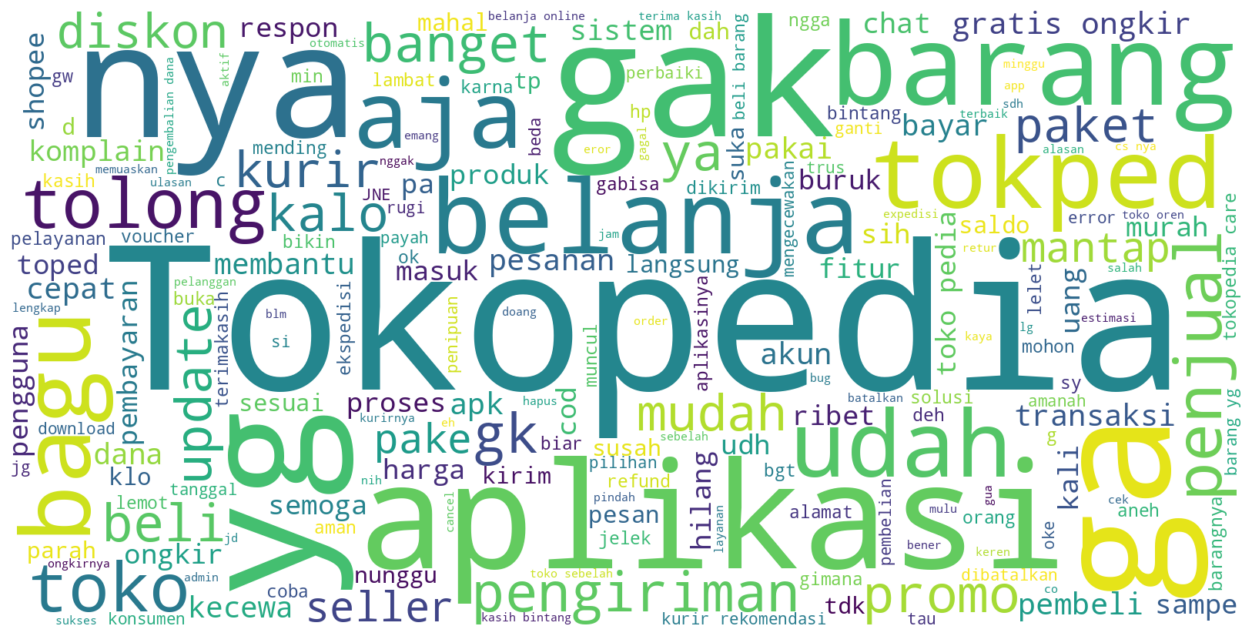

In [22]:
df['Review']=df['Review'].fillna('')

text=' '.join(df['Review'].astype(str).tolist())

stopwords = set(nltk.corpus.stopwords.words('indonesian'))

wc=WordCloud(stopwords=stopwords, background_color='white', width=1600, height=800)
wc.generate(text)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

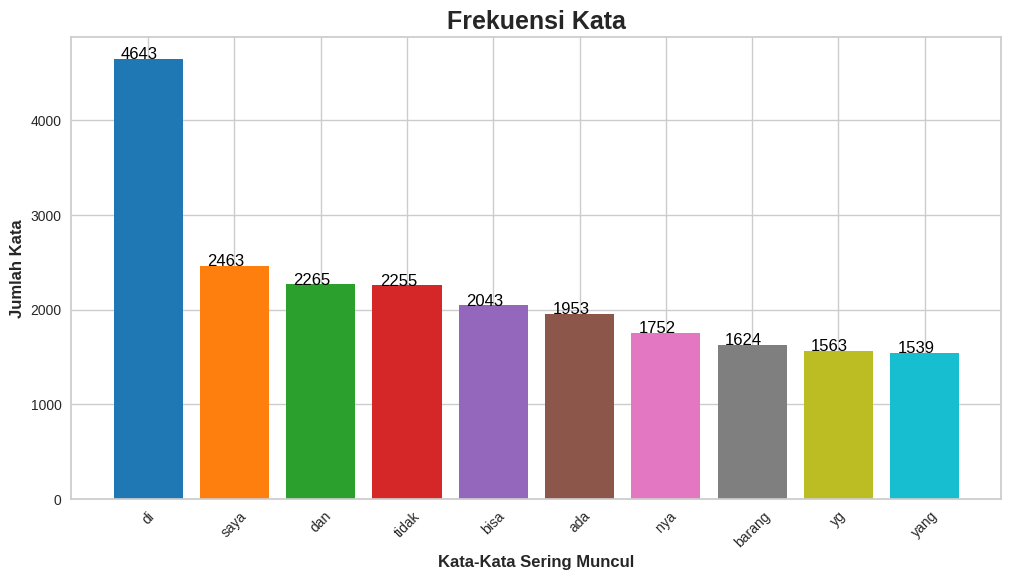

In [23]:
text = " ".join(df["Review"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()



---



5. Proses Cleaning

In [24]:
def clean_review(text):
    if pd.isnull(text):
        return ""

    # Hapus URL
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Hapus HTML
    text = re.sub(r'<.*?>', '', text)

    # Hapus emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Hapus simbol dan tanda baca (kecuali huruf dan spasi)
    text = re.sub(r'[^\w\s]', '', text)

    return text

df['Cleaning_Review'] = df['Review'].apply(clean_review)



---



6. Case Folding

In [25]:
df['Cleaning_Review'] = df['Cleaning_Review'].astype(str)
df['Review_lower'] = df['Cleaning_Review'].str.lower()

print(df[['Cleaning_Review', 'Review_lower']].head())

                                 Cleaning_Review  \
0                                         mantap   
1  akun tibatiba ke apus pas daftar lagi ga bisa   
2                                   Jelek banget   
3                                        terbaik   
4                      KEMANA FITUR TUKAR TAMBAH   

                                    Review_lower  
0                                         mantap  
1  akun tibatiba ke apus pas daftar lagi ga bisa  
2                                   jelek banget  
3                                        terbaik  
4                      kemana fitur tukar tambah  


In [22]:
#Menghapus White Space
df['Review_lower'] = df['Review_lower'].str.replace(r'\s+', ' ', regex=True)

In [151]:
#Rapikan kolom yang hasil case folding
#df = df.drop(columns=['Review'])

In [152]:
#df = df.rename(columns={'Review_lower': 'Review'})



---



7. Normalisasi Kata

In [26]:
#Muat Kamus Tidak Baku
kamus_data=pd.read_excel('/content/drive/MyDrive/LASKAR AI/SUBMISSION/kamuskatabaku.xlsx')

kamus_data = kamus_data.rename(columns={'tidak_baku': 'Kata_Tidak_Baku', 'kata_baku': 'Kata_Baku'})
kamus_data.head()

,Kata_Tidak_Baku,Kata_Baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [28]:
def normalisasi_text(text, kamus_data):
    kata_kata = text.split()

    kamus_dict = dict(zip(kamus_data['Kata_Tidak_Baku'], kamus_data['Kata_Baku']))
    kata_kata_normal = [kamus_dict.get(kata, kata) for kata in kata_kata]

    text_normal = ' '.join(kata_kata_normal)

    return text_normal


def normalize_dataframe(df, kamus_data):
    if 'Review_lower' not in df.columns:
        raise ValueError("Kolom 'Review_lower' tidak ditemukan di DataFrame")

    required_cols = ['Kata_Tidak_Baku', 'Kata_Baku']
    if not all(col in kamus_data.columns for col in required_cols):
        raise ValueError(f"Kamus data harus memiliki kolom {required_cols}")

    df['Review_lower'] = df['Review_lower'].astype(str)

    df['Review_Normalisasi'] = df['Review_lower'].apply(lambda x: normalisasi_text(x, kamus_data))

    return df

df = normalize_dataframe(df, kamus_data)
print(df[['Review_lower', 'Review_Normalisasi']].head())

                                    Review_lower  \
0                                         mantap   
1  akun tibatiba ke apus pas daftar lagi ga bisa   
2                                   jelek banget   
3                                        terbaik   
4                      kemana fitur tukar tambah   

                                  Review_Normalisasi  
0                                             mantap  
1  akun tibatiba ke hapus pas daftar lagi tidak bisa  
2                                       jelek banget  
3                                            terbaik  
4                          kemana fitur tukar tambah  


In [ ]:
#Rapikan kolom yang hasil normalisasi
#df = df.drop(columns=['Review'])

In [ ]:
#df = df.rename(columns={'Review_Normalisasi': 'Review'})



---



8. Tokenization

In [29]:
def tokenize(text):
  tokens=text.split()
  return tokens

df['Review_tokenize']=df['Review_Normalisasi'].apply(tokenize)

df.head(10)
print(df[['Review_Normalisasi','Review_tokenize']].head())

                                  Review_Normalisasi  \
0                                             mantap   
1  akun tibatiba ke hapus pas daftar lagi tidak bisa   
2                                       jelek banget   
3                                            terbaik   
4                          kemana fitur tukar tambah   

                                     Review_tokenize  
0                                           [mantap]  
1  [akun, tibatiba, ke, hapus, pas, daftar, lagi,...  
2                                    [jelek, banget]  
3                                          [terbaik]  
4                     [kemana, fitur, tukar, tambah]  




---



9. Menghapus Stopwords

In [30]:
stopwords = set(nltk.corpus.stopwords.words('indonesian'))

def remove_stopwords(text):
    return [word for word in text if word not in stopwords]

df['Review_stopword removal1'] = df['Review_tokenize'].apply(lambda x: remove_stopwords(x))

df.head(10)
print(df[['Review_tokenize', 'Review_stopword removal1']].head())

                                     Review_tokenize  \
0                                           [mantap]   
1  [akun, tibatiba, ke, hapus, pas, daftar, lagi,...   
2                                    [jelek, banget]   
3                                          [terbaik]   
4                     [kemana, fitur, tukar, tambah]   

               Review_stopword removal1  
0                              [mantap]  
1  [akun, tibatiba, hapus, pas, daftar]  
2                       [jelek, banget]  
3                             [terbaik]  
4                [kemana, fitur, tukar]  


In [ ]:
#Rapikan kolom yang hasil normalisasi
#df = df.drop(columns=['Review','tokenize'])

In [ ]:
#df = df.rename(columns={'stopword removal': 'Review'})



---



10. Stemming

In [31]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['Review_stemming'] = df['Review_stopword removal1'].apply(lambda x: ' '.join(stem_text(x)))

In [32]:
print(df[['Review_stopword removal1','Review_stemming']].head())

               Review_stopword removal1                 Review_stemming
0                              [mantap]                          mantap
1  [akun, tibatiba, hapus, pas, daftar]  akun tibatiba hapus pas daftar
2                       [jelek, banget]                    jelek banget
3                             [terbaik]                            baik
4                [kemana, fitur, tukar]                mana fitur tukar


In [33]:
df

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Review_lower,Review_Normalisasi,Review_tokenize,Review_stopword removal1,Review_stemming
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,[mantap],[mantap],mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"[akun, tibatiba, ke, hapus, pas, daftar, lagi,...","[akun, tibatiba, hapus, pas, daftar]",akun tibatiba hapus pas daftar
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"[jelek, banget]","[jelek, banget]",jelek banget
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,[terbaik],[terbaik],baik
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"[kemana, fitur, tukar, tambah]","[kemana, fitur, tukar]",mana fitur tukar
...,...,...,...,...,...,...,...,...,...,...,...
14993,dabc7729-e774-4469-9f73-9e46a0dceb95,Sundari Ndcune,"mantap sob,cuma pengantaran sampai nya agak la...",5,2025-01-03,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai ya agak lambat,"[mantap, sobcuma, pengantaran, sampai, ya, aga...","[mantap, sobcuma, pengantaran, ya, lambat]",mantap sobcuma antar ya lambat
14994,ff6e138f-48c2-427b-90cb-7c6987d3bbe9,Mariyah Mariyah,aku baru banget menggunakan aplikasi Tokopedia...,5,2025-01-03,aku baru banget menggunakan aplikasi Tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,"[aku, baru, banget, menggunakan, aplikasi, tok...","[banget, aplikasi, tokopedia, mudahan, mengece...",banget aplikasi tokopedia mudah kecewa langgan
14995,a6921862-8688-48e2-8302-e04a2057e3d4,Mamah Fajar,Najis banget nih aplikasi,1,2025-01-03,Najis banget nih aplikasi,najis banget nih aplikasi,najis banget nih aplikasi,"[najis, banget, nih, aplikasi]","[najis, banget, nih, aplikasi]",najis banget nih aplikasi
14997,5609d48d-e844-4c1a-acde-b76b8e1726ac,Keiko Iko,penanganan masalah keluhan konsumen berhari2 ....,1,2025-01-03,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,"[penanganan, masalah, keluhan, konsumen, berha...","[penanganan, keluhan, konsumen, berhari, itupu...",tangan keluh konsumen hari itu selesai inigopa...


In [ ]:
#Rapikan kolom yang hasil stemming
#df = df.drop(columns=['Review'])

In [ ]:
#df = df.rename(columns={'stemming': 'Review'})

In [34]:
df.to_csv('Hasil_Preprocessing.csv', index=False)
from google.colab import files
files.download('Hasil_Preprocessing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



11. WordCloud Setelah Preprocessing

In [35]:
df ='/content/drive/MyDrive/LASKAR AI/SUBMISSION/Hasil_Preprocessing.csv'
df = pd.read_csv(df)
df

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Review_lower,Review_Normalisasi,Review_tokenize,Review_stopword removal1,Review_stemming
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,['mantap'],['mantap'],mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"['akun', 'tibatiba', 'ke', 'hapus', 'pas', 'da...","['akun', 'tibatiba', 'hapus', 'pas', 'daftar']",akun tibatiba hapus pas daftar
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"['jelek', 'banget']","['jelek', 'banget']",jelek banget
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,['terbaik'],['terbaik'],baik
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"['kemana', 'fitur', 'tukar', 'tambah']","['kemana', 'fitur', 'tukar']",mana fitur tukar
...,...,...,...,...,...,...,...,...,...,...,...
11996,dabc7729-e774-4469-9f73-9e46a0dceb95,Sundari Ndcune,"mantap sob,cuma pengantaran sampai nya agak la...",5,2025-01-03,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai ya agak lambat,"['mantap', 'sobcuma', 'pengantaran', 'sampai',...","['mantap', 'sobcuma', 'pengantaran', 'ya', 'la...",mantap sobcuma antar ya lambat
11997,ff6e138f-48c2-427b-90cb-7c6987d3bbe9,Mariyah Mariyah,aku baru banget menggunakan aplikasi Tokopedia...,5,2025-01-03,aku baru banget menggunakan aplikasi Tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,"['aku', 'baru', 'banget', 'menggunakan', 'apli...","['banget', 'aplikasi', 'tokopedia', 'mudahan',...",banget aplikasi tokopedia mudah kecewa langgan
11998,a6921862-8688-48e2-8302-e04a2057e3d4,Mamah Fajar,Najis banget nih aplikasi,1,2025-01-03,Najis banget nih aplikasi,najis banget nih aplikasi,najis banget nih aplikasi,"['najis', 'banget', 'nih', 'aplikasi']","['najis', 'banget', 'nih', 'aplikasi']",najis banget nih aplikasi
11999,5609d48d-e844-4c1a-acde-b76b8e1726ac,Keiko Iko,penanganan masalah keluhan konsumen berhari2 ....,1,2025-01-03,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,"['penanganan', 'masalah', 'keluhan', 'konsumen...","['penanganan', 'keluhan', 'konsumen', 'berhari...",tangan keluh konsumen hari itu selesai inigopa...


In [51]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

stopwords_indonesia = set(nltk.corpus.stopwords.words('indonesian'))

custom_stopwords = {'tokopedia', 'tokped', 'toped', 'apk', 'aplikasi', 'app', 'pakai', 'beli', 'barang', 'pesan',
                  'jual', 'order', 'produk', 'fitur', 'akun', 'update', 'seller', 'kurir', 'layanan', 'transaksi',
                  'sistem', 'cs', 'pengiriman', 'toko', 'fitur', 'aja', 'nih', 'deh', 'dong', 'yah', 'lho', 'kayak',
                  'banget', 'sih', 'dong', 'moga', 'gue', 'gua', 'ongkir', 'promo', 'diskon', 'paket', 'fitur',
                  'voucher', 'produk', 'order', 'proses', 'update', 'login', 'status', 'otomatis', 'sistem', 'akun',
                  'daftar', 'tambah', 'kode', 'jne', 'shopee', 'gopay', 'ekspedisi', 'care', 'admin', 'email', 'akun',
                  'paylater', 'saldo', 'a', 'nya', 'aja', 'kali', 'pas', 'doang', 'tau', 'buka', 'kasih', 'biar', 'loh',
                  'gitu', 'udah', 'mohon', 'menu', 'chat', 'langsung', 'alamat', 'sih', 'nih', 'dong', 'kayak', 'deh',
                  'tuh', 'lagi', 'aja', 'lah', 'kirim', 'belanja', 'yang', 'dan', 'untuk', 'dari', 'dengan', 'ini', 'itu',
                  'di', 'ke', 'pada', 'juga', 'ada', 'tidak', 'kalo', 'aja', 'sih', 'nya', 'mah', 'tapi', 'udah', 'nih',
                  'kan', 'kita', 'dia', 'mereka', 'ya', 'saya', 'aku', 'gue', 'ku', 'mu', 'gw', 'si', 'hp', 'bisa', 'saja',
                  'lah', 'sampai', 'yg', 'dgn', 'dr', 'utk', 'jd', 'lg', 'trs', 'nih', 'mau', 'eh', 'ah', 'oh', 'gimana',
                  'terima', 'kasih', 'belah', 'kemarin', 'layan', 'respon', 'pilih', 'lazada', 'cod', 'estimasi', 'download', 'bilang',
                  'bayar', 'oreng', 'online', 'muncul', 'bantu', 'cari', 'langgan', 'dana', 'minggu', 'keranjang', 'uang', 'harga','tibatiba',
                  'tukar'
                 }

stopwords_gabungan = stopwords_indonesia.update(custom_stopwords)

def remove_stopwords_from_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    text = text.lower()

    words = word_tokenize(text)

    filtered_words = [word for word in words if word not in stopwords_indonesia]

    return " ".join(filtered_words)

df['Review_stopword removal2'] = df['Review_stemming'].apply(remove_stopwords_from_text)

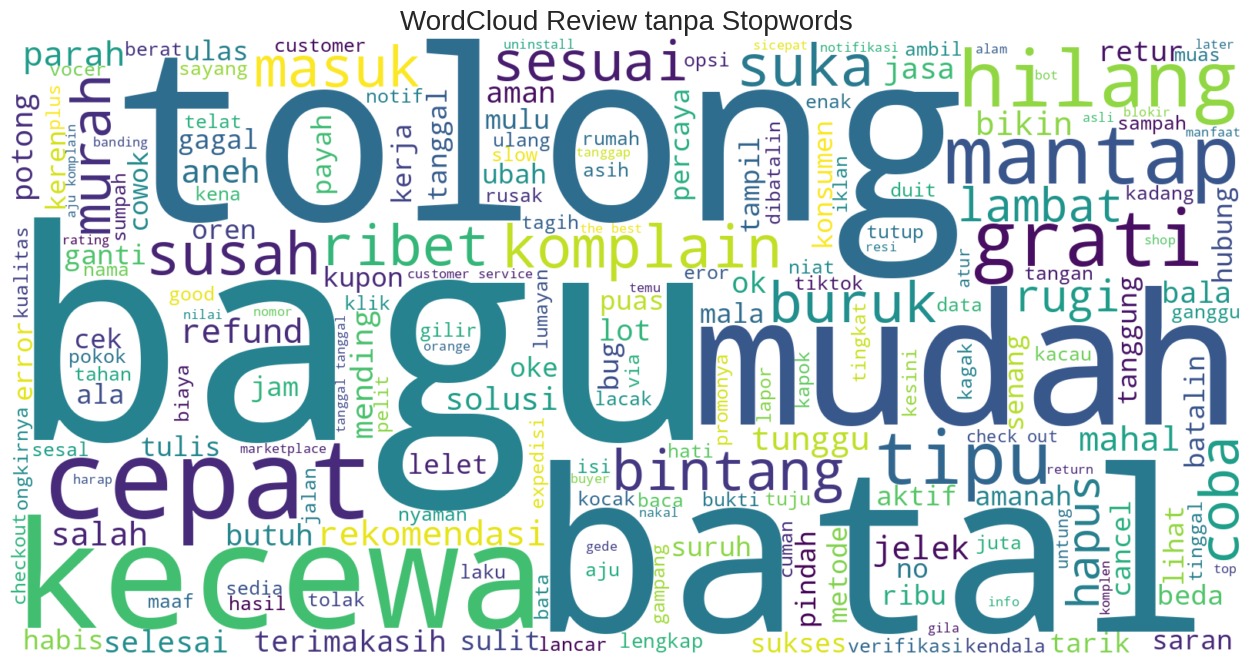

In [52]:
df['Review_stopword removal2'] = df['Review_stopword removal2'].fillna('')

text = ' '.join(df['Review_stopword removal2'].astype(str).tolist())

stopwords = set(nltk.corpus.stopwords.words('indonesian'))

custom_stopwords = {'tokopedia', 'tokped', 'toped', 'apk', 'aplikasi', 'app','pakai', 'beli', 'barang', 'pesan',
                    'jual', 'order', 'produk', 'fitur', 'akun', 'update','seller', 'kurir', 'layanan', 'transaksi',
                    'sistem', 'cs', 'pengiriman', 'toko', 'fitur','aja', 'nih', 'deh', 'dong', 'yah', 'lho', 'kayak',
                    'banget', 'sih', 'dong','moga', 'gue', 'gua','ongkir', 'promo', 'diskon', 'paket', 'fitur',
                    'voucher', 'produk', 'order', 'proses','update', 'login', 'status', 'otomatis', 'sistem', 'akun',
                    'daftar', 'tambah', 'kode','jne', 'shopee', 'gopay', 'ekspedisi', 'care', 'admin', 'email', 'akun',
                    'paylater', 'saldo','a', 'nya', 'aja', 'kali', 'pas', 'doang', 'min', 'buka', 'kasih', 'biar', 'loh',
                    'gitu', 'udah', 'mohon', 'menu', 'chat', 'langsung', 'alamat','sih', 'nih', 'dong','kayak', 'deh',
                    'tuh', 'lagi', 'aja', 'lah','kirim','belanja','yang', 'dan', 'untuk', 'dari', 'dengan', 'ini', 'itu',
                    'di', 'ke', 'pada', 'juga', 'ada', 'tidak', 'kalo', 'aja', 'sih', 'nya', 'mah', 'tapi', 'udah', 'nih',
                    'kan', 'kita', 'dia', 'mereka', 'ya', 'saya', 'aku', 'gue', 'ku', 'mu', 'gw', 'si', 'hp', 'bisa', 'saja',
                    'lah', 'sampai', 'yg', 'dgn', 'dr', 'utk', 'jd', 'lg', 'trs', 'nih', 'mau', 'eh', 'ah', 'oh', 'gimana',
                    'terima', 'kasih','belah','kemarin','layan','respon','pilih','lazada','cod','estimasi','download','bilang',
                    'bayar','orang','online','muncul','bantu','cari','langgan','dana','minggu','keranjang','uang','harga'
}
stopwords.update(custom_stopwords)

wc = WordCloud(stopwords=stopwords, background_color='white', width=1600, height=800)
wc.generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Review tanpa Stopwords', fontsize=20)
plt.show()


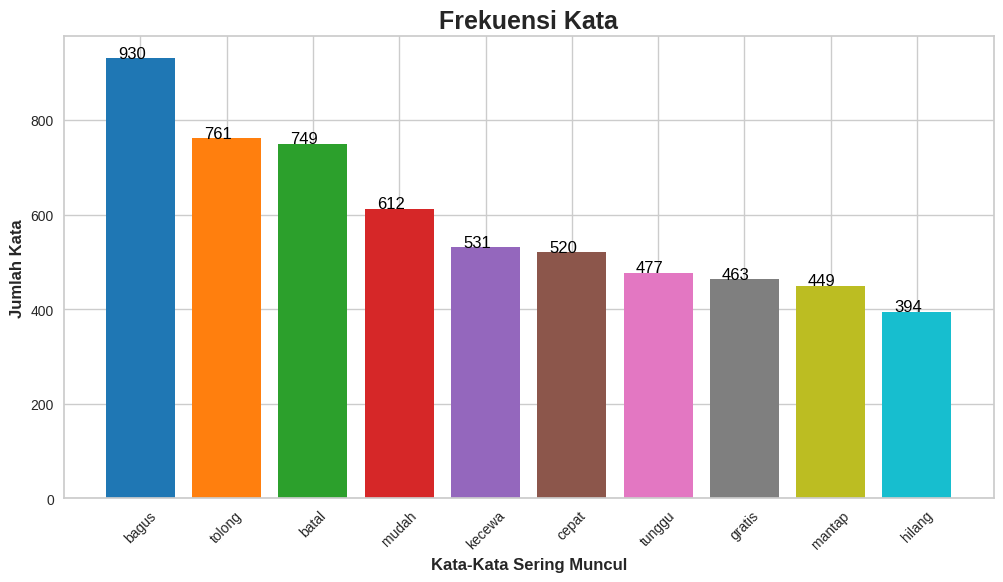

In [55]:
text = " ".join(df['Review_stopword removal2'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()



---



##**5. Labellling Data**



---



In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Review ID                 12001 non-null  object
 1   Username                  12001 non-null  object
 2   Review                    12001 non-null  object
 3   Rating                    12001 non-null  int64 
 4   Date                      12001 non-null  object
 5   Cleaning_Review           11955 non-null  object
 6   Review_lower              11955 non-null  object
 7   Review_Normalisasi        11952 non-null  object
 8   Review_tokenize           12001 non-null  object
 9   Review_stopword removal1  12001 non-null  object
 10  Review_stemming           11898 non-null  object
 11  Sentiment                 12001 non-null  object
 12  Review_stopword removal2  12001 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.2+ MB


In [57]:
df = df.dropna(subset=['Review'])

In [58]:
def convert_rating_to_sentiment(df, rating_column='Rating'):
    if rating_column not in df.columns:
        raise ValueError(f"Kolom '{rating_column}' tidak ditemukan di DataFrame")

    df[rating_column] = pd.to_numeric(df[rating_column], errors='coerce')

    def get_sentiment(rating):
        if pd.isna(rating):
            return np.nan
        elif rating <= 2:
            return "Negatif"
        elif rating == 3:
            return "Netral"
        elif rating >= 4:
            return "Positif"
        else:
            return np.nan

    df['Sentiment'] = df[rating_column].apply(get_sentiment)

    sentiment_counts = df['Sentiment'].value_counts()
    total = sentiment_counts.sum()

    print("Distribusi Sentimen:")
    for sentiment, count in sentiment_counts.items():
        percentage = (count / total) * 100
        print(f"{sentiment}: {count} ({percentage:.1f}%)")

    return df

df = convert_rating_to_sentiment(df, rating_column='Rating')
df

Distribusi Sentimen:
Negatif: 5736 (47.8%)
Positif: 5430 (45.2%)
Netral: 835 (7.0%)


,Review ID,Username,Review,Rating,Date,Cleaning_Review,Review_lower,Review_Normalisasi,Review_tokenize,Review_stopword removal1,Review_stemming,Sentiment,Review_stopword removal2
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,['mantap'],['mantap'],mantap,Positif,mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"['akun', 'tibatiba', 'ke', 'hapus', 'pas', 'da...","['akun', 'tibatiba', 'hapus', 'pas', 'daftar']",akun tibatiba hapus pas daftar,Negatif,hapus
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"['jelek', 'banget']","['jelek', 'banget']",jelek banget,Positif,jelek
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,['terbaik'],['terbaik'],baik,Positif,
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"['kemana', 'fitur', 'tukar', 'tambah']","['kemana', 'fitur', 'tukar']",mana fitur tukar,Negatif,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,dabc7729-e774-4469-9f73-9e46a0dceb95,Sundari Ndcune,"mantap sob,cuma pengantaran sampai nya agak la...",5,2025-01-03,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai ya agak lambat,"['mantap', 'sobcuma', 'pengantaran', 'sampai',...","['mantap', 'sobcuma', 'pengantaran', 'ya', 'la...",mantap sobcuma antar ya lambat,Positif,mantap sobcuma lambat
11997,ff6e138f-48c2-427b-90cb-7c6987d3bbe9,Mariyah Mariyah,aku baru banget menggunakan aplikasi Tokopedia...,5,2025-01-03,aku baru banget menggunakan aplikasi Tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,"['aku', 'baru', 'banget', 'menggunakan', 'apli...","['banget', 'aplikasi', 'tokopedia', 'mudahan',...",banget aplikasi tokopedia mudah kecewa langgan,Positif,mudah kecewa
11998,a6921862-8688-48e2-8302-e04a2057e3d4,Mamah Fajar,Najis banget nih aplikasi,1,2025-01-03,Najis banget nih aplikasi,najis banget nih aplikasi,najis banget nih aplikasi,"['najis', 'banget', 'nih', 'aplikasi']","['najis', 'banget', 'nih', 'aplikasi']",najis banget nih aplikasi,Negatif,najis
11999,5609d48d-e844-4c1a-acde-b76b8e1726ac,Keiko Iko,penanganan masalah keluhan konsumen berhari2 ....,1,2025-01-03,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,"['penanganan', 'masalah', 'keluhan', 'konsumen...","['penanganan', 'keluhan', 'konsumen', 'berhari...",tangan keluh konsumen hari itu selesai inigopa...,Negatif,tangan keluh konsumen selesai inigopay later k...


In [59]:
#Muat kamus positif dan negatf lexicon
file1   = '/content/drive/My Drive/LASKAR AI/SUBMISSION/positive.tsv'
file2   = '/content/drive/My Drive/LASKAR AI/SUBMISSION/negative.tsv'

pos = pd.read_csv(file1, sep='\t')
neg = pd.read_csv(file1, sep='\t')

In [60]:
def analyze_sentiment_lexicon_correlation(df, review_column, rating_column, pos_lexicon=None, neg_lexicon=None):
    if pos_lexicon is None or neg_lexicon is None:
        print("Please provide positive and negative lexicons to analyze sentiment.")
        return df

    def get_sentiment_lexicon(review):
        tokens = word_tokenize(review)
        pos_count = sum(1 for token in tokens if token in pos_lexicon)
        neg_count = sum(1 for token in tokens if token in neg_lexicon)

        if pos_count > neg_count:
            return "Positif"
        elif neg_count > pos_count:
            return "Negatif"
        else:
            return "Neutre"

    df['Sentiment_Lexicon'] = df[review_column].apply(get_sentiment_lexicon)
    return df



---



##**6. Model Algoritman SVM**



---



In [61]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')


Jumlah Data Latih: 9600
Jumlah Data Uji: 2401


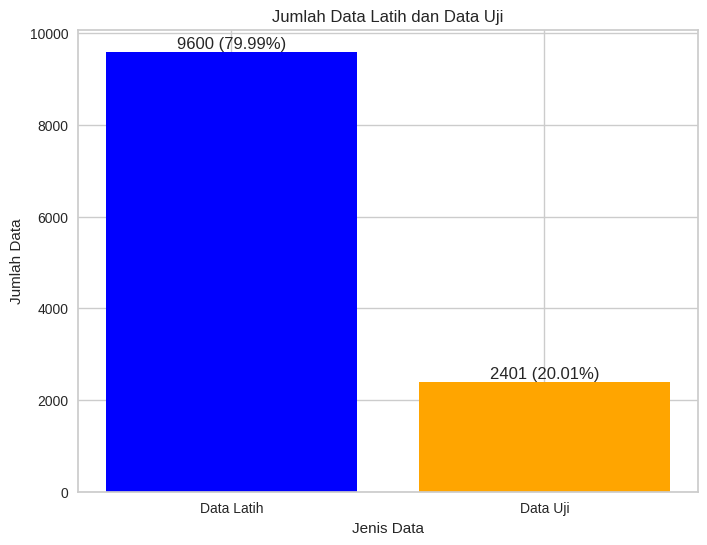

In [62]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.7,
             f'{height} ({(height / (train_size + test_size) * 100):.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


In [63]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Mendefinisikan vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 2. Menampilkan hasil vektorisasi
print("Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized.toarray())

# 3. Menampilkan sebagian kecil matriks
print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih:")
print(X_train_vectorized[5, :].toarray())


Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]]


In [64]:
#Membuat dan melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

#Melakukan prediksi pada data uji
y_pred_svm = svm.predict(X_test_vectorized)

In [65]:
#Confusion matrix
cm_svm=confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[1078    1   81]
 [ 124    2   42]
 [ 184    1  888]]


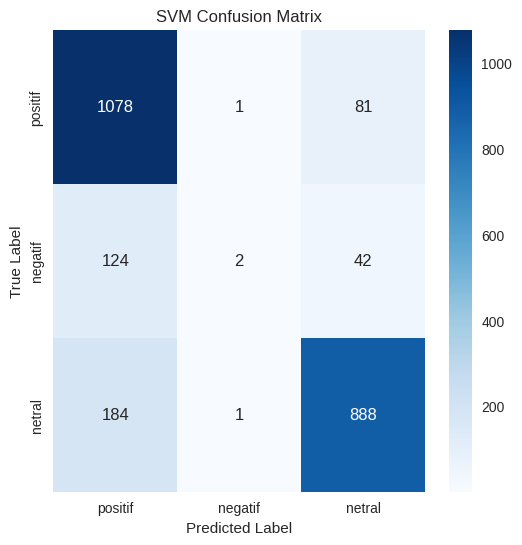

In [67]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif', 'netral'],
                yticklabels=['positif', 'negatif', 'netral'])

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix("SVM", y_test, y_pred_svm)


In [68]:
# Menampilkan accuracy untuk SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

# Menampilkan classification report untuk SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.819658475635152

SVM Accuracy: 81.97%

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.78      0.93      0.85      1160
      Netral       0.50      0.01      0.02       168
     Positif       0.88      0.83      0.85      1073

    accuracy                           0.82      2401
   macro avg       0.72      0.59      0.57      2401
weighted avg       0.80      0.82      0.79      2401





---

